# Polynomial Regression - Example 1 (Position Salaries)

In [9]:
import pandas as pd
from matplotlib import pyplot as plt

df = pd.read_csv('../Auditorium-Exercises/data/Position_Salaries.csv')

In [10]:
df.head()

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


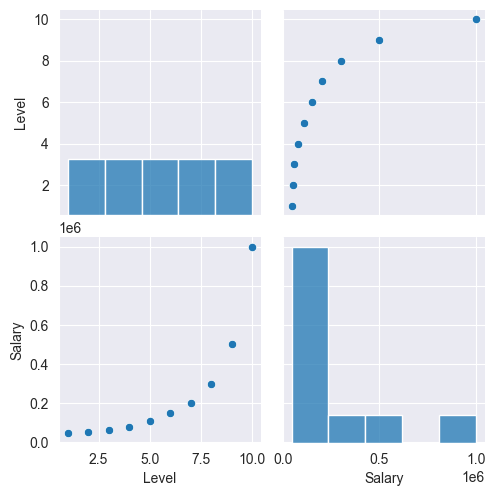

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(df)
plt.show()

In [18]:
from sklearn.model_selection import train_test_split
X = df.iloc[:,1:2].values
Y = df.iloc[:,2:3].values
X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=0.2)

In [19]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

X_train=scaler.fit_transform(X_train)
X_test=scaler.fit_transform(X_test)
Y_train=scaler.fit_transform(Y_train)
Y_test=scaler.fit_transform(Y_test)

In [23]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error 

poly_reg = PolynomialFeatures(4)

X_poly_train = poly_reg.fit_transform(X_train)
X_poly_test = poly_reg.fit_transform(X_test)

lin_reg = LinearRegression()
lin_reg.fit(X_poly_train,Y_train)

Y_pred = lin_reg.predict(X_poly_test)

In [25]:
test_score=mean_squared_error(Y_test,Y_pred)
print("MSE for the testing Dataset: " +  str(test_score))

MSE for the testing Dataset: 0.10002689204133655


In [34]:
import numpy as np

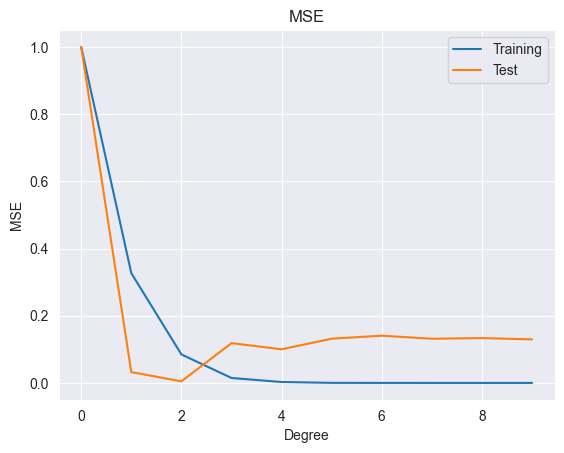

In [37]:
train = []
test = []
for i in range(0, 10):
    poly_reg = PolynomialFeatures(degree=i)
    X_poly_train = poly_reg.fit_transform(X_train)
    X_poly_test = poly_reg.fit_transform(X_test)
    
    lin_reg = LinearRegression()
    lin_reg.fit(X_poly_train,Y_train)
    Y_pred = lin_reg.predict(X_poly_test)
    
    training_score = mean_squared_error(Y_train, lin_reg.predict(X_poly_train))
    test_score = mean_squared_error(Y_test, Y_pred)
    
    train.append(training_score)
    test.append(test_score)
    
x=np.arange(10)
plt.plot(x,train,label="Training")
plt.plot(x,test,label="Test")
plt.legend()
plt.xlabel("Degree")
plt.ylabel("MSE")
plt.title("MSE");
plt.show()
    

# Polynomial Regression - Example 2 (Housing)

In [47]:

df = pd.read_csv('../Auditorium-Exercises/data/Housing.csv')

In [48]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


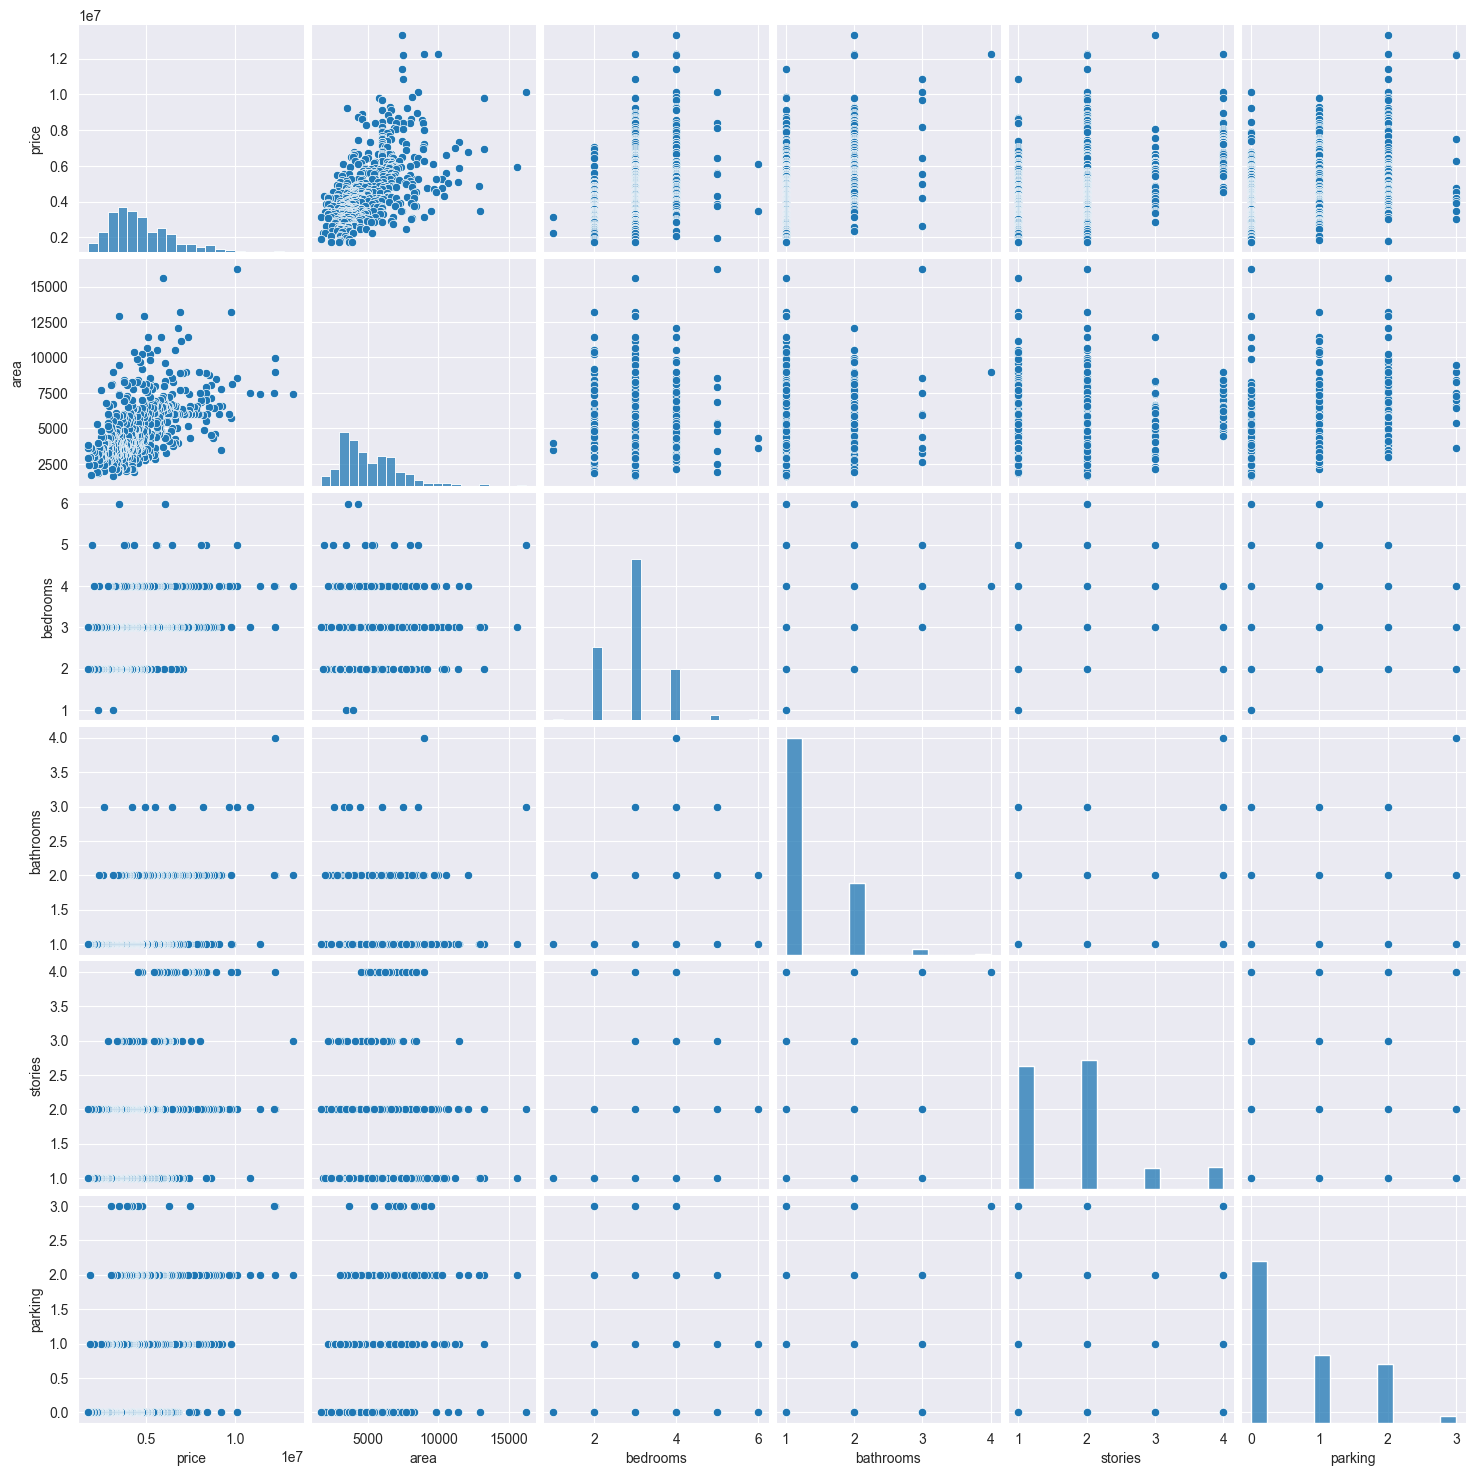

In [50]:
import seaborn as sns

sns.pairplot(df)
plt.show()

In [51]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

In [52]:
for column in df.columns:
    if type(df[column].to_list()[0]) == str:
        df[column] = encoder.fit_transform(df[column])

In [53]:
from sklearn.model_selection import train_test_split

X = df.drop(['price'], axis=1)
Y = df['price']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [65]:
poly_reg = PolynomialFeatures(2)
X_poly_train = poly_reg.fit_transform(X_train)
X_poly_test = poly_reg.transform(X_test)

lin_reg = LinearRegression()
lin_reg.fit(X_poly_train,Y_train)

Y_pred = lin_reg.predict(X_poly_test)

In [66]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

r2_score(Y_test, Y_pred)

0.44743846578798163

In [67]:
mean_absolute_error(Y_test, Y_pred)

836226.0490840432

In [68]:
mean_squared_error(Y_test, Y_pred)

1592216100908.9587

In [ ]:
r2_scores = []
for i in range(1, 10):
    poly_reg = PolynomialFeatures(degree=i)
    X_poly_train = poly_reg.fit_transform(X_train)
    X_poly_test = poly_reg.transform(X_test)
    
    lin_reg = LinearRegression()
    lin_reg.fit(X_poly_train,Y_train)
    
    Y_pred = lin_reg.predict(X_poly_test)
    
    r2_scores.append(r2_score(Y_test, Y_pred))

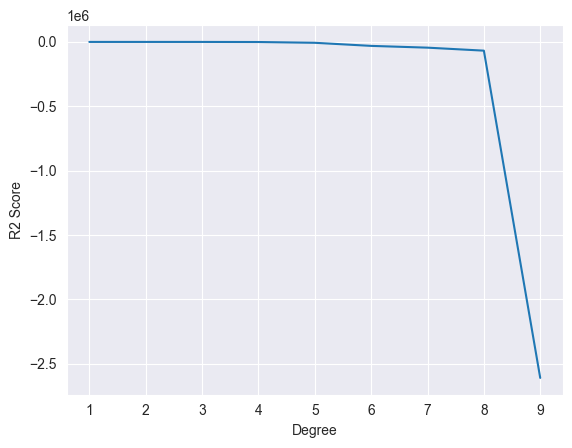

In [63]:
plt.plot([i for i in range(1,10)],r2_scores)
plt.xlabel("Degree")
plt.ylabel("R2 Score")
plt.show()